In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.0f}'.format)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

df['date'] = pd.to_datetime(df['date'])
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
1,2013-01-01,1,BABY CARE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
2,2013-01-01,1,BEAUTY,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
3,2013-01-01,1,BEVERAGES,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
4,2013-01-01,1,BOOKS,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0


# 📈 1. How Have Total Sales Evolved Over Time?

In [3]:
sales_over_time = df.groupby('date')['sales'].sum().reset_index()
fig = px.line(sales_over_time, x='date', y='sales', title="Total Sales Over Time")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Sales",
    template="plotly",
    title_x=0.5
)
fig.write_html("../visualizations/interactive/sales_over_time.html")
fig.show()

# 📈 2. Which products or categories contribute the most to total revenue?

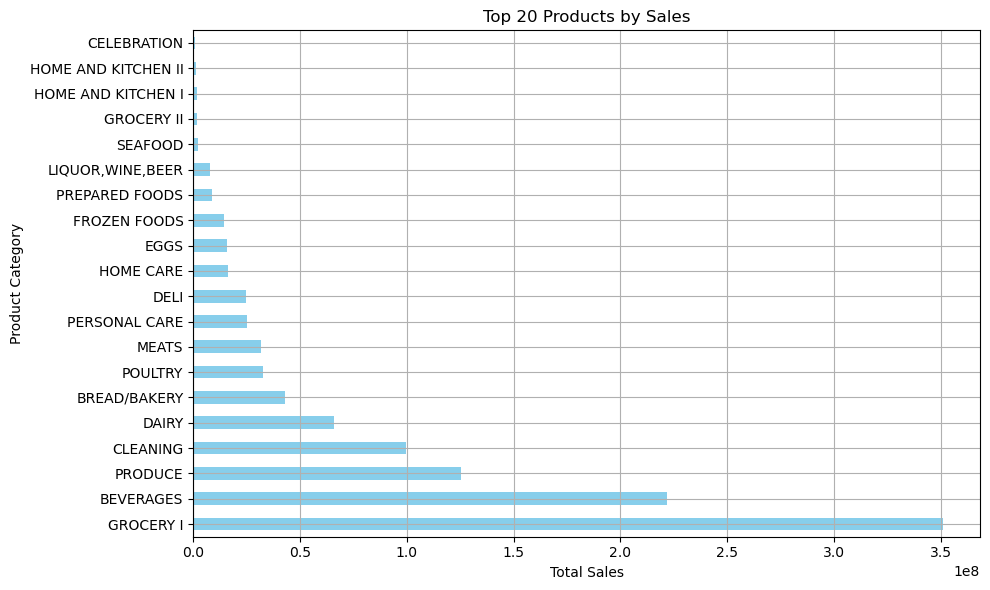

In [4]:
top_products = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 20 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(True)
plt.tight_layout()

plt.savefig('../visualizations/static/top_20_products_by_sales.png')

plt.show()

## 🔍 3. Which stores, cities, or states are the top performers in terms of revenue?

3.1 **Top Stores by Revenue**

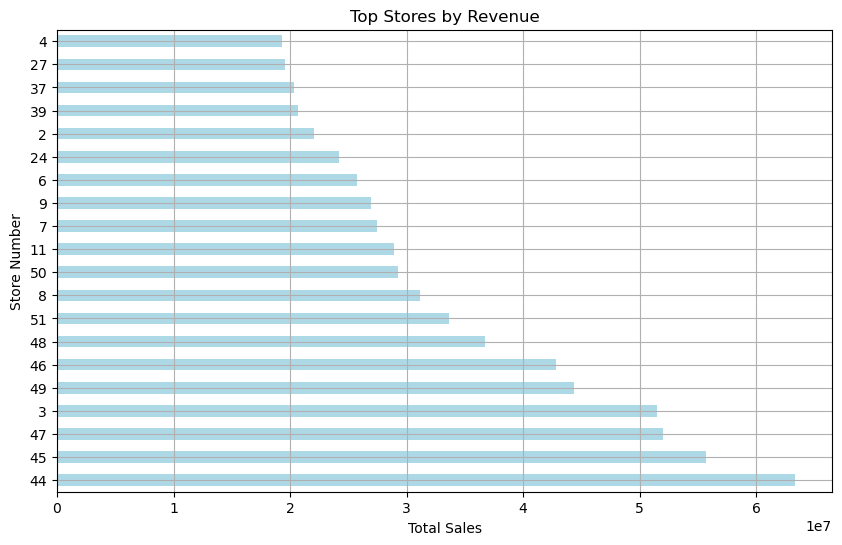

In [5]:
top_stores = df.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_stores.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Stores by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.grid(True)

plt.savefig('../visualizations/static/top_stores_by_sales.png')
plt.show()

3.2 **Top Cities by Revenue**

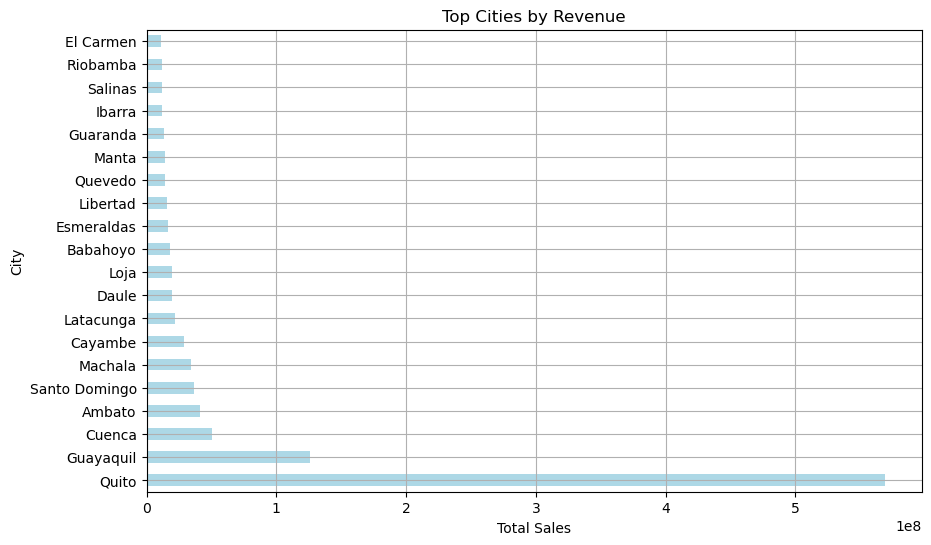

In [6]:
top_cities = df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_cities.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Cities by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(True)

plt.savefig('../visualizations/static/top_cities_by_sales.png')
plt.show()

3.3 **Top States by Revenue**

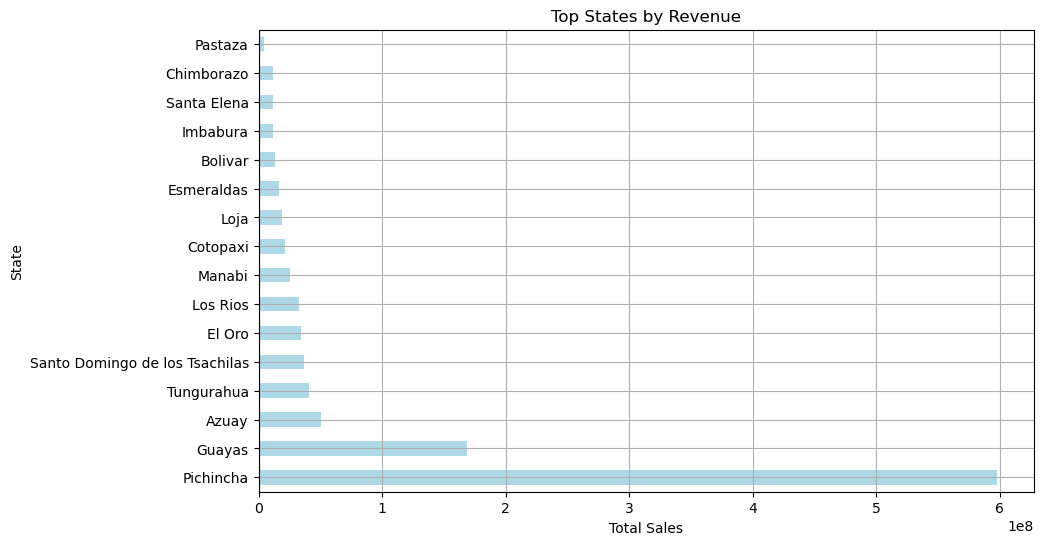

In [7]:
top_regions = df.groupby('state')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_regions.head(20).plot(kind='barh', color='lightblue')
plt.title('Top States by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.grid(True)

plt.savefig('../visualizations/static/top_states_by_sales.png')
plt.show()

# 📈 4. What is the average order size across stores, regions, and categories?

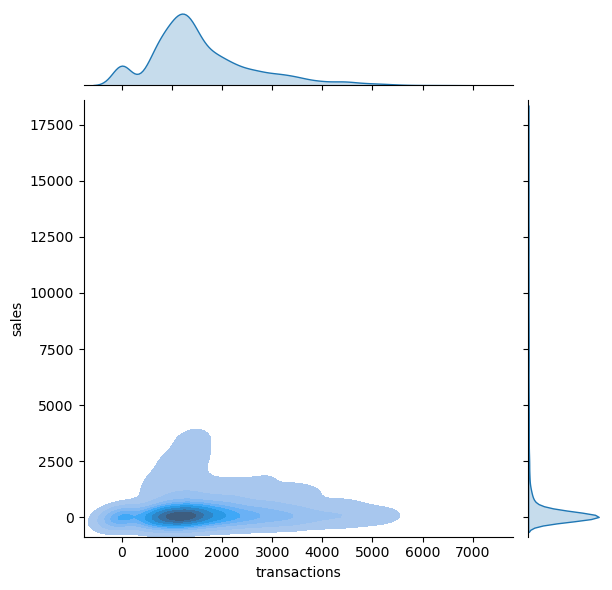

In [8]:
sample_df = df.sample(n=5000, random_state=42)

sns.jointplot(
    x="transactions",
    y="sales",
    data=sample_df,
    kind="kde",
    fill=True
)

## 📆 5.1 What are the trends in sales per week?

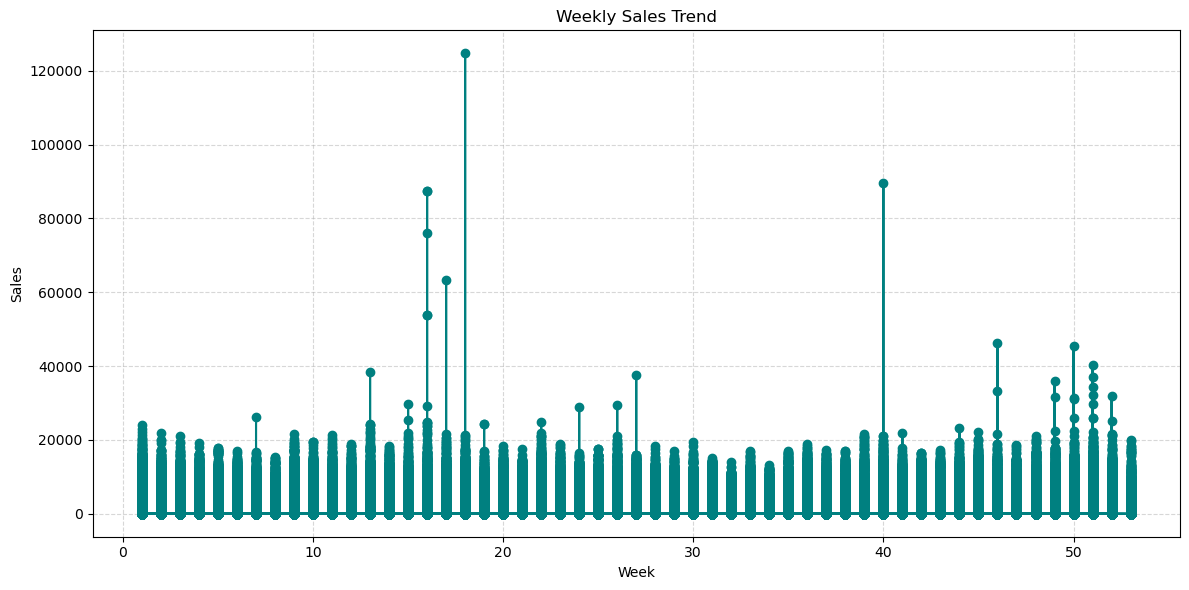

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['week'], df['sales'], marker='o', linestyle='-', color='teal')

plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
zero_sales_weeks = df[df['sales'] > 10000]
zero_sales_weeks

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
3048,2013-01-02,44,GROCERY I,"10,686",0,Normal Day,NaN,False,93,Quito,Pichincha,A,5,"4,821",2013,1,1,1,Wednesday,0,0,0,0,0,0
3081,2013-01-02,45,GROCERY I,"11,422",0,Normal Day,NaN,False,93,Quito,Pichincha,A,11,"4,208",2013,1,1,1,Wednesday,0,0,0,0,0,0
3114,2013-01-02,46,GROCERY I,"10,892",0,Normal Day,NaN,False,93,Quito,Pichincha,A,14,"4,886",2013,1,1,1,Wednesday,0,0,0,0,0,0
3147,2013-01-02,47,GROCERY I,"10,867",0,Normal Day,NaN,False,93,Quito,Pichincha,A,14,"4,161",2013,1,1,1,Wednesday,0,0,0,0,0,0
8394,2013-01-05,44,GROCERY I,"10,699",0,Work Day,National,False,93,Quito,Pichincha,A,5,"4,921",2013,1,1,1,Saturday,0,0,"1,962",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050292,2017-08-13,45,BEVERAGES,"10,671",14,Normal Day,NaN,False,50,Quito,Pichincha,A,11,"4,054",2017,8,32,3,Sunday,0,"12,609","2,694",1,0,38
3050301,2017-08-13,45,GROCERY I,"12,723",38,Normal Day,NaN,False,50,Quito,Pichincha,A,11,"4,054",2017,8,32,3,Sunday,0,"15,190","2,311",1,0,92
3050334,2017-08-13,46,GROCERY I,"10,557",40,Normal Day,NaN,False,50,Quito,Pichincha,A,14,"3,839",2017,8,32,3,Sunday,0,"14,233","2,036",1,0,94
3050358,2017-08-13,47,BEVERAGES,"10,279",9,Normal Day,NaN,False,50,Quito,Pichincha,A,14,"3,741",2017,8,32,3,Sunday,0,"12,295","1,632",1,0,37


## 📆 5.2 What are the trends in sales per month?

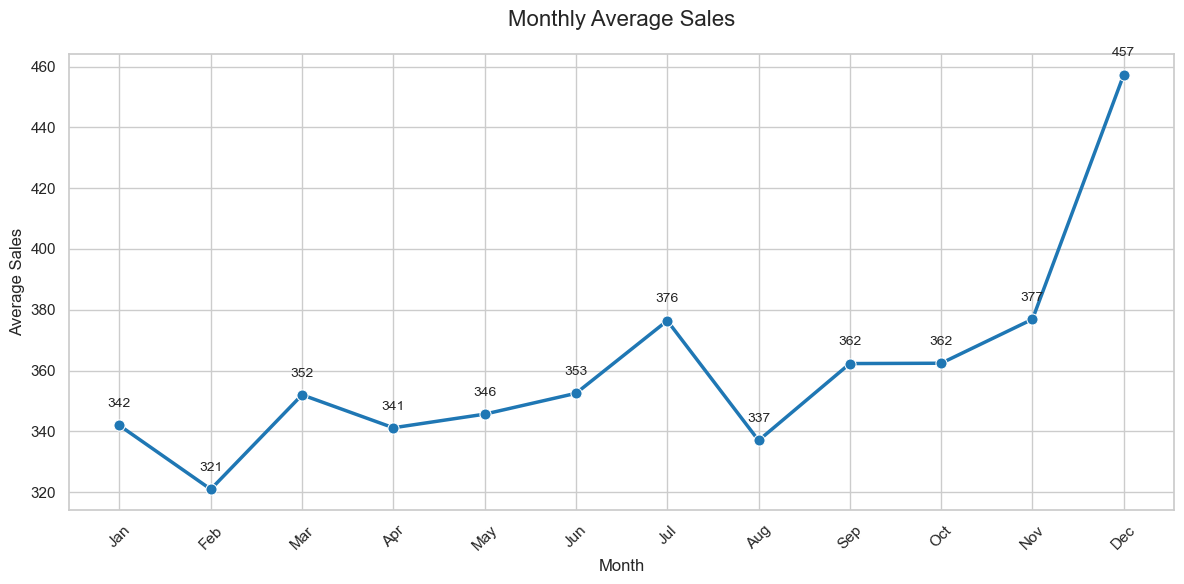

In [11]:
monthly_avg = df.groupby('month')['sales'].mean()

# Assuming monthly_avg is your Series: month -> avg sales
# Convert it to a proper DataFrame
monthly_data = pd.DataFrame({
    'month': monthly_avg.index,
    'avg_sales': monthly_avg.values
})

# Convert month numbers to names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data['month_name'] = monthly_data['month'].map(lambda x: month_names[x-1])

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create ordered categorical for proper month ordering
monthly_data['month_name'] = pd.Categorical(
    monthly_data['month_name'],
    categories=month_names,
    ordered=True
)

# Line plot with markers
ax = sns.lineplot(
    data=monthly_data,
    x='month_name',
    y='avg_sales',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color='#1f77b4'
)

# Customize the plot
ax.set_title('Monthly Average Sales', fontsize=16, pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for i, row in monthly_data.iterrows():
    ax.text(
        i,
        row['avg_sales'] + 5,
        f"{row['avg_sales']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## 📆 5.3 What are the trends in sales per quarter?

<Figure size 1000x800 with 0 Axes>

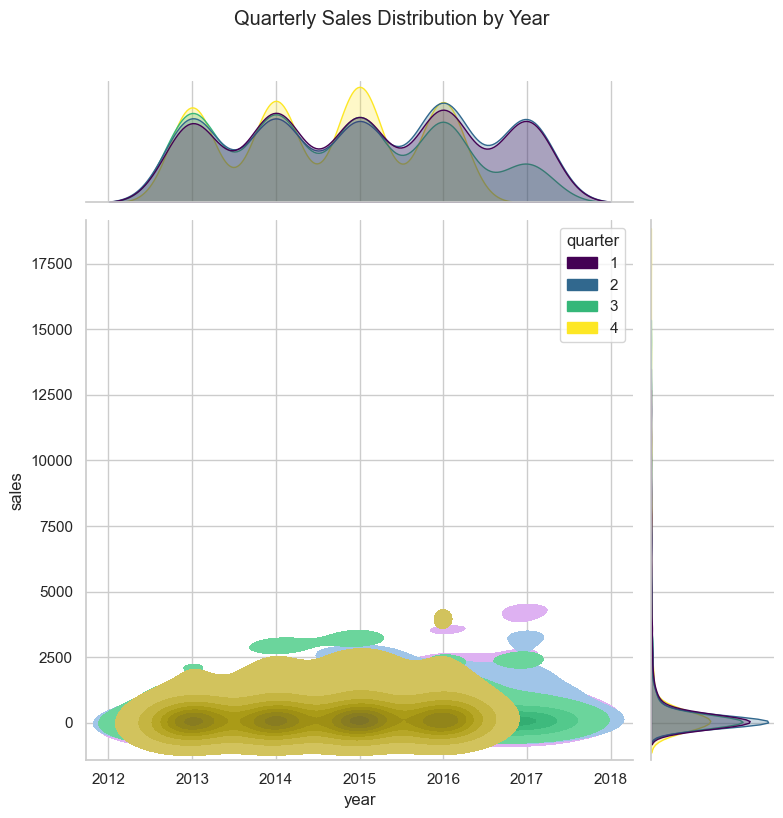

In [12]:
plt.figure(figsize=(10, 8))
sns.jointplot(
    x="year",
    y="sales",
    hue="quarter", 
    data=sample_df,
    kind="kde",
    palette="viridis",
    fill=True,
    height=8,
    ratio=4
)
plt.suptitle("Quarterly Sales Distribution by Year", y=1.02)
plt.tight_layout()

# 📆 6. How do sales differ on weekdays versus weekends?

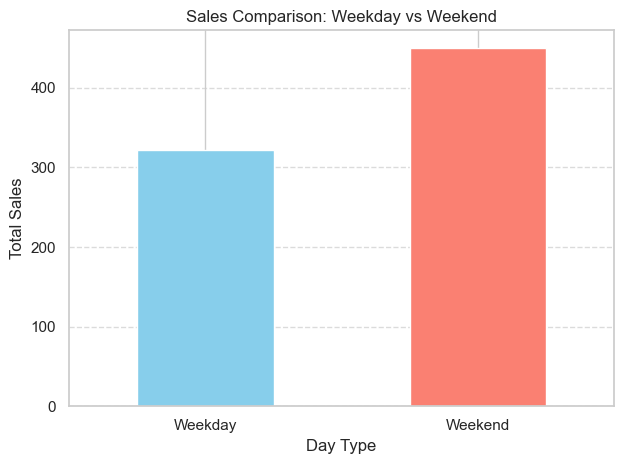

In [13]:
sales_comparison = df.groupby('is_weekend')['sales'].agg(['sum', 'mean', 'count']).rename(index={True: 'Weekend', False: 'Weekday'})

sales_comparison['mean'].plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Sales Comparison: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🚀 7. Are sales peaking during certain months, holidays, or quarters of the year?

#### 7.2 Holiday vs. Non-Holiday Sales

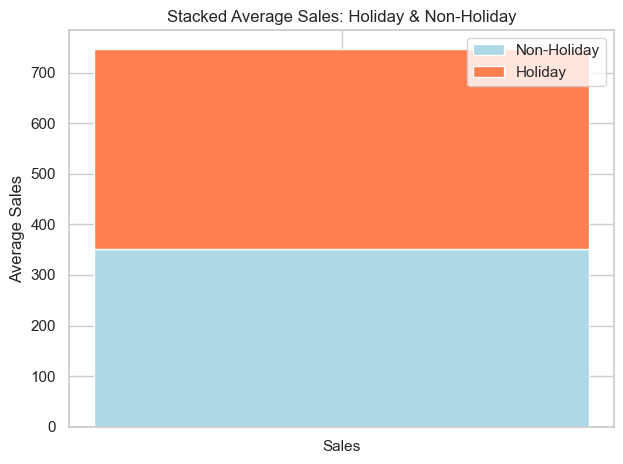

In [14]:
holiday_sales = df.groupby('is_holiday')['sales'].mean()
holiday_sales.index = ['Non-Holiday', 'Holiday']
plt.bar('Sales', holiday_sales['Non-Holiday'], label='Non-Holiday', color='lightblue')
plt.bar('Sales', holiday_sales['Holiday'], bottom=holiday_sales['Non-Holiday'], label='Holiday', color='coral')

plt.title('Stacked Average Sales: Holiday & Non-Holiday')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()
plt.show()


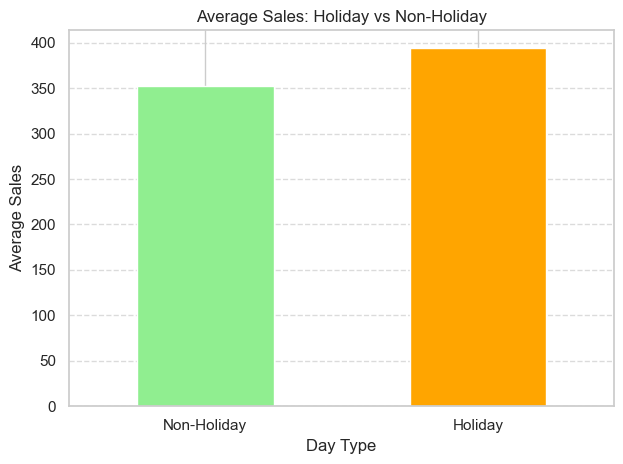

In [15]:
holiday_sales.plot(kind='bar', color=['lightgreen', 'orange'])

plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 7.3 Specific Holidays 

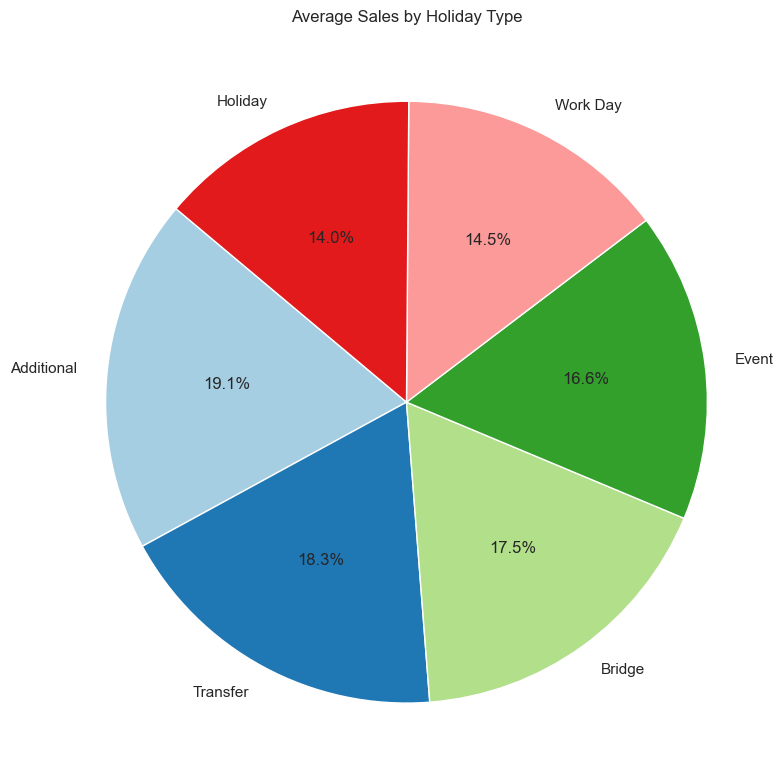

In [16]:
specific_holidays = df[df['is_holiday'] == 1].groupby('holiday_type')['sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(specific_holidays, labels=specific_holidays.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Sales by Holiday Type')
plt.axis('equal')  
plt.tight_layout()
plt.show()


# 🚀 9. What impact do promotions have on sales volume?

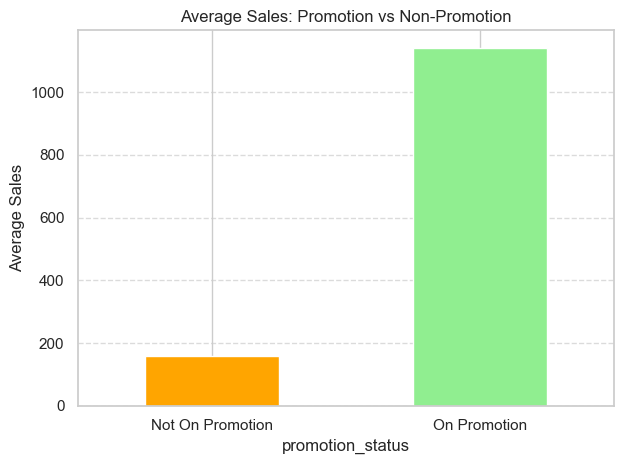

In [17]:
df['promotion_status'] = df['onpromotion'].apply(lambda x: 'On Promotion' if x > 0 else 'Not On Promotion')

promo_sales = df.groupby('promotion_status')['sales'].mean()

promo_sales.plot(kind='bar', color=['orange', 'lightgreen'])

plt.title('Average Sales: Promotion vs Non-Promotion')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🚀 10. Is there a cumulative effect of promotions (e.g., last 7 days of promo)?

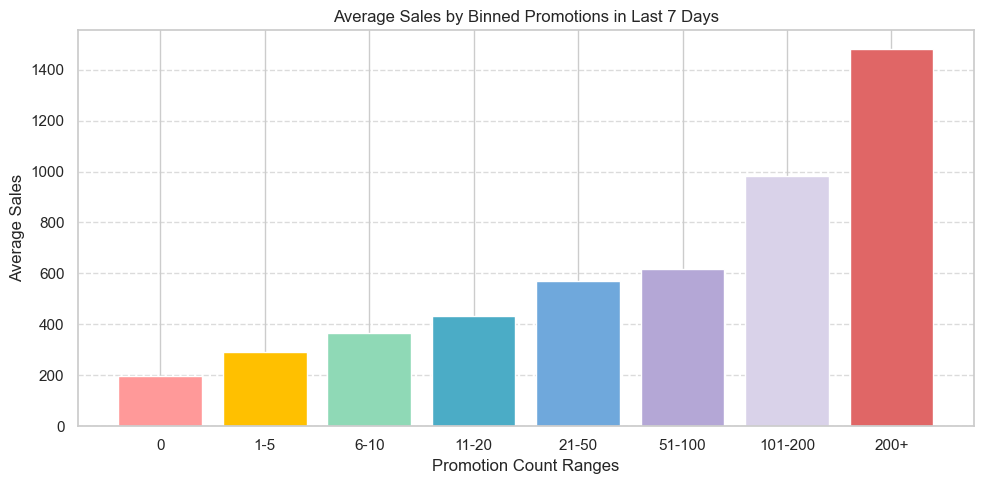

In [18]:
bins = [0, 1, 5, 10, 20, 50, 100, 200, df['promo_last_7_days'].max()]
labels = ['0', '1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '200+']

df['promo_bin'] = pd.cut(df['promo_last_7_days'], bins=bins, labels=labels, right=False)
binned_avg_sales = df.groupby('promo_bin')['sales'].mean().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#4bacc6', '#6fa8dc', '#b4a7d6', '#d9d2e9', '#e06666']

# Plot
plt.figure(figsize=(10, 5))
plt.bar(binned_avg_sales['promo_bin'], binned_avg_sales['sales'], color=colors)

plt.title('Average Sales by Binned Promotions in Last 7 Days')
plt.xlabel('Promotion Count Ranges')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 🚀 11. Are there specific families or stores where promotions are more effective?

In [19]:
df['promotion_status'] = df['onpromotion'].apply(lambda x: 'On Promotion' if x > 0 else 'Not On Promotion')
print(df['promotion_status'].value_counts())
avg_sales_by_family = df.groupby(['family', 'promotion_status'])['sales'].mean().sort_values(ascending=False).reset_index()
avg_sales_by_family

promotion_status
Not On Promotion    2428528
On Promotion         625820
Name: count, dtype: int64


,family,promotion_status,sales
0,GROCERY I,On Promotion,"4,427"
1,BEVERAGES,On Promotion,"3,225"
2,GROCERY I,Not On Promotion,"2,717"
3,PRODUCE,On Promotion,"2,435"
4,BEVERAGES,Not On Promotion,"1,290"
...,...,...,...
60,HARDWARE,Not On Promotion,1
61,SCHOOL AND OFFICE SUPPLIES,Not On Promotion,1
62,HOME APPLIANCES,Not On Promotion,0
63,BABY CARE,Not On Promotion,0


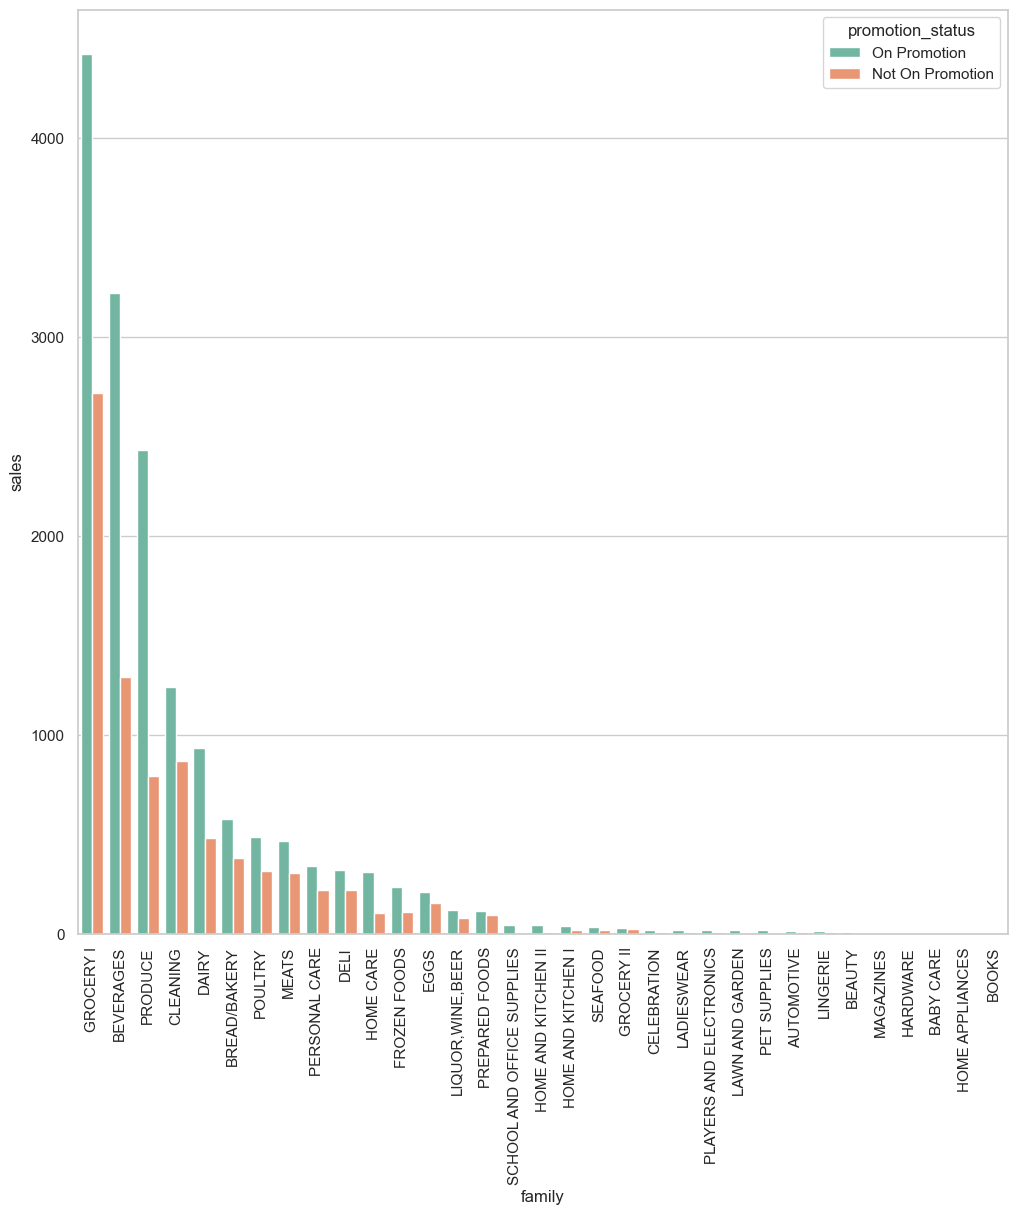

In [20]:
plt.figure(figsize=(12,12))
sns.barplot(data=avg_sales_by_family, x='family', y='sales', hue='promotion_status', palette='Set2')
plt.xticks(rotation=90)
plt.show()

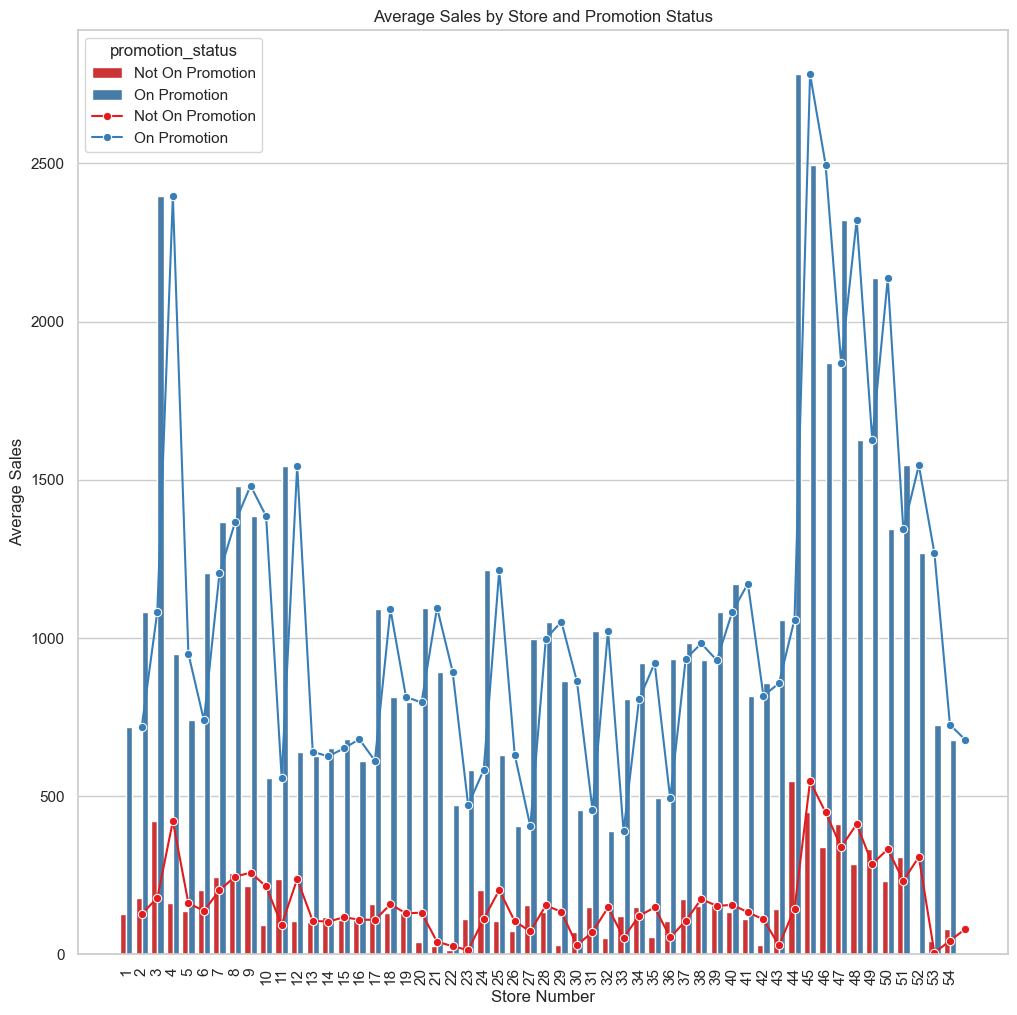

In [21]:
avg_sales_by_store = df.groupby(['store_nbr', 'promotion_status'])['sales'].mean().reset_index()
avg_sales_by_store = avg_sales_by_store.sort_values(by='store_nbr').reset_index(drop=True)
plt.figure(figsize=(12, 12))
sns.barplot(data=avg_sales_by_store, x='store_nbr', y='sales', hue='promotion_status', palette='Set1', width=0.8)
sns.lineplot(data=avg_sales_by_store, x='store_nbr', y='sales', hue='promotion_status', palette='Set1', marker='o')

plt.xticks(rotation=90)
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store and Promotion Status')
plt.show()

# 🛡️ 12. How did the crisis impact sales and transactions?

## 🛡️ 12.1 Crisis Impact by transactions


<function matplotlib.pyplot.show(close=None, block=None)>

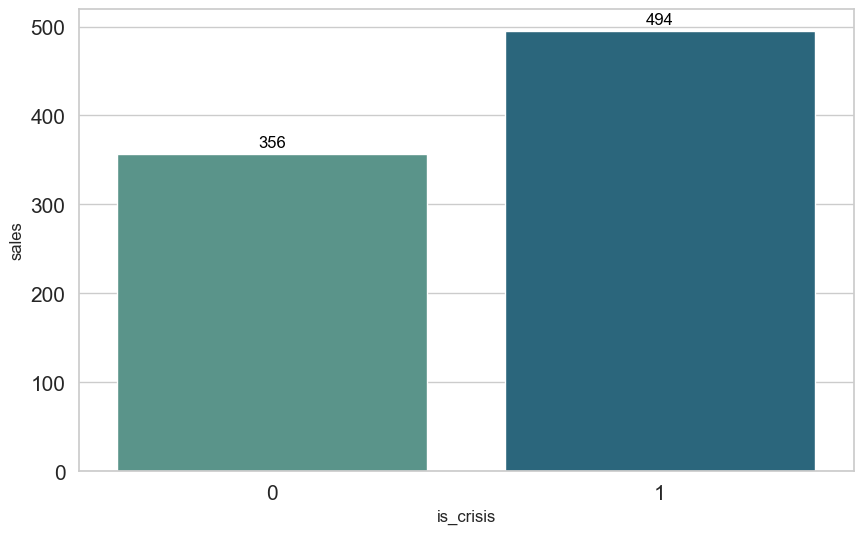

In [22]:
avg_sales_transactions_crisis = df.groupby('is_crisis')[['sales', 'transactions']].mean().reset_index()
avg_sales_transactions_crisis

plt.figure(figsize = (10, 6))
K=sns.barplot(x="is_crisis",y="sales",data=avg_sales_transactions_crisis,palette="crest")
for p in K.patches:
    K.annotate(int(p.get_height()), (p.get_x() + 0.40, p.get_height() + 5), ha = 'center', va = 'bottom', color = 'black')
    K.tick_params(axis = 'both', labelsize = 15)
    
plt.show

## 🛡️ 12.2 Crisis Impact by Store Type

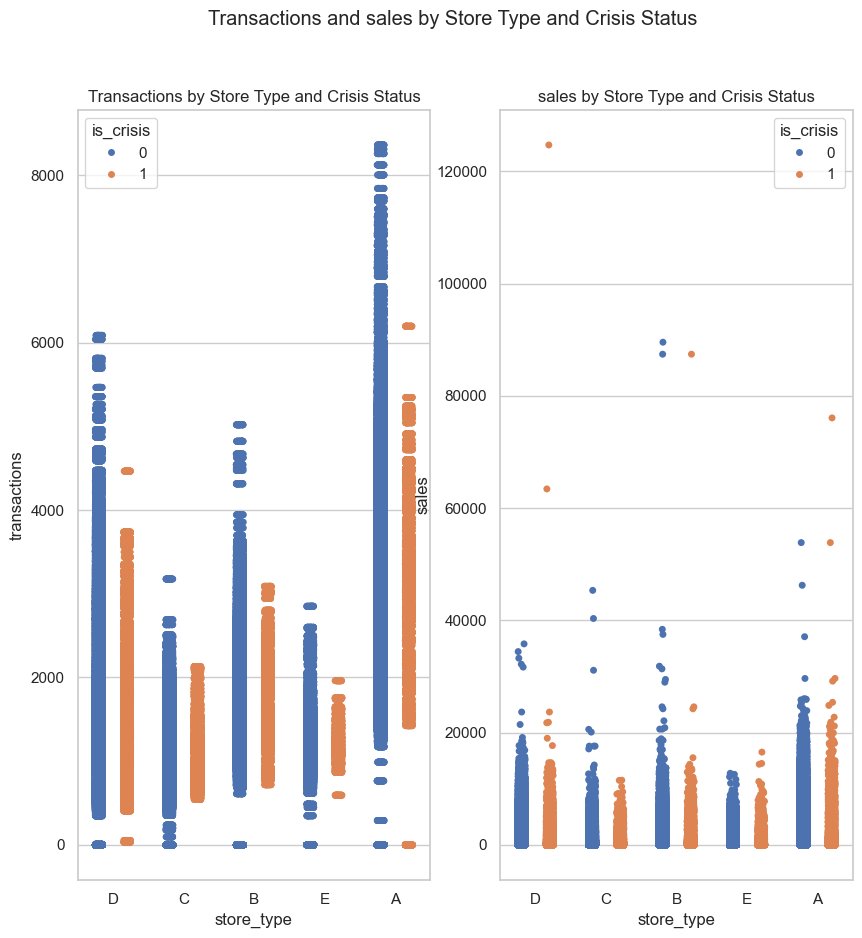

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.stripplot(data=df, x='store_type', y='transactions', hue='is_crisis', dodge=True)
plt.title('Transactions by Store Type and Crisis Status')
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='store_type', y='sales', hue='is_crisis', dodge=True)
plt.title('sales by Store Type and Crisis Status')
plt.suptitle("Transactions and sales by Store Type and Crisis Status")
plt.show()

## 🛡️ 12.3 Crisis Impact by promotions

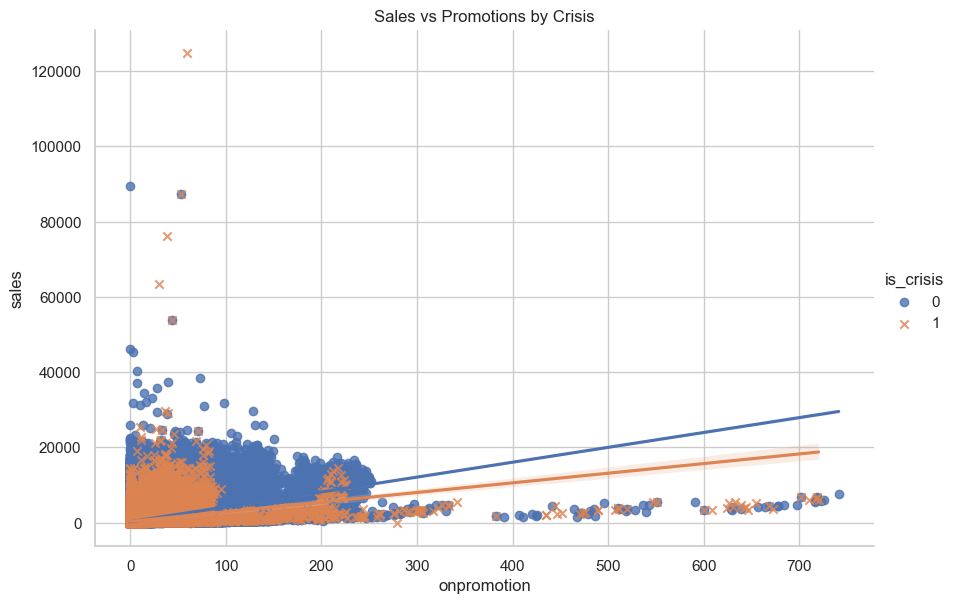

In [24]:
sns.lmplot(data=df, x='onpromotion', y='sales', hue='is_crisis', height=6, aspect=1.5, markers=['o', 'x'])
plt.title('Sales vs Promotions by Crisis')
plt.grid(True)
plt.show()

## 🛡️ 12.4 Crisis Impact by holiday

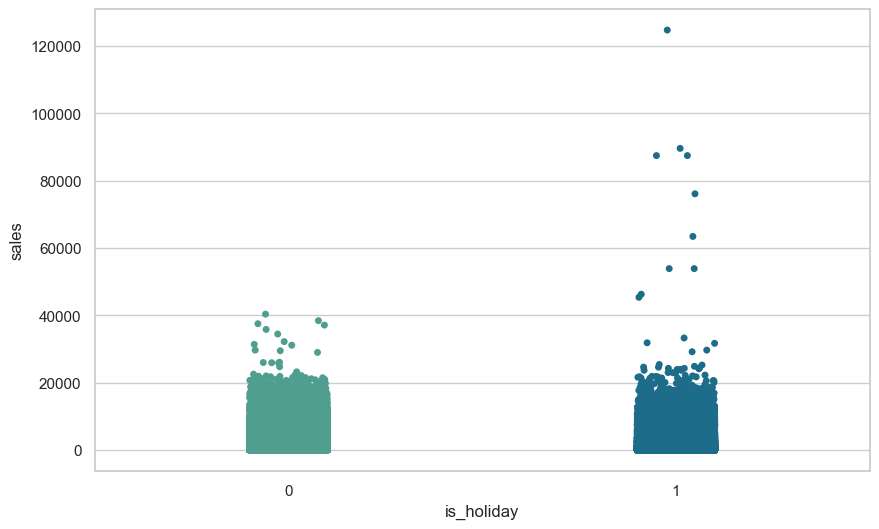

In [25]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df,x='is_holiday',y='sales',palette="crest")
plt.show()

## 🛡️ 12.5 Crisis Impact weekly and monthly

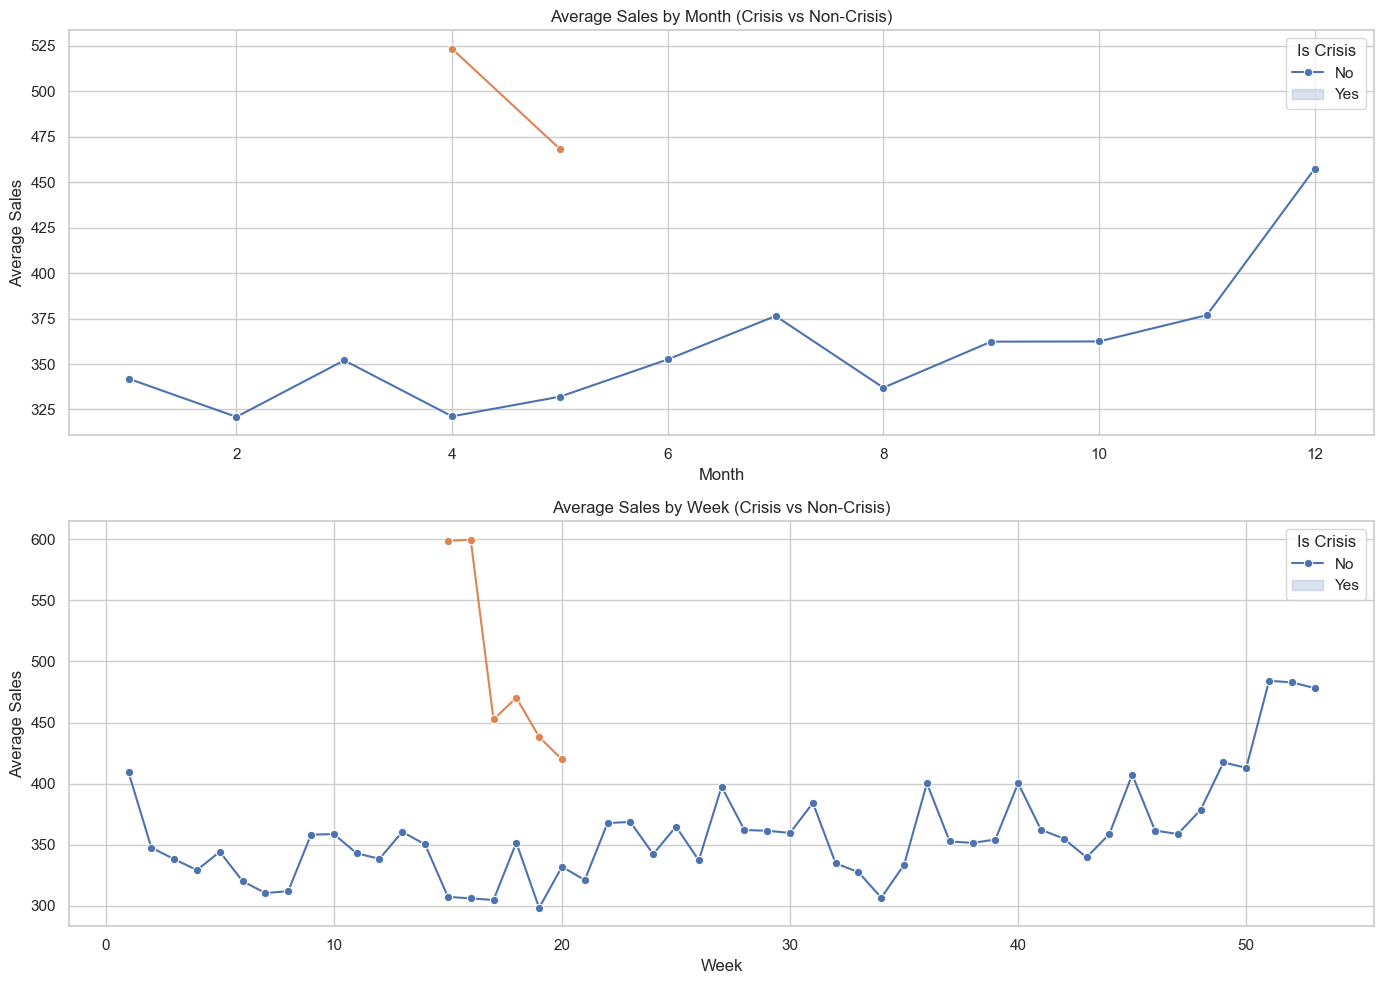

In [26]:
avg_sales_by_month_crisis = df.groupby(['is_crisis', 'month'])['sales'].mean().reset_index()
avg_sales_by_week_crisis = df.groupby(['is_crisis', 'week'])['sales'].mean().reset_index()

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=False)

sns.lineplot(
    data=avg_sales_by_month_crisis,
    x='month',
    y='sales',
    hue='is_crisis',
    marker='o',
    ax=axes[0]
)
axes[0].set_title('Average Sales by Month (Crisis vs Non-Crisis)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Sales')
axes[0].legend(title='Is Crisis', labels=['No', 'Yes'])

sns.lineplot(
    data=avg_sales_by_week_crisis,
    x='week',
    y='sales',
    hue='is_crisis',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Average Sales by Week (Crisis vs Non-Crisis)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Average Sales')
axes[1].legend(title='Is Crisis', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## 🛡️ 12.6 Crisis Impact by transactions and sales
Already made in cell `39`

## 🛡️ 12.7 Crisis Impact by family

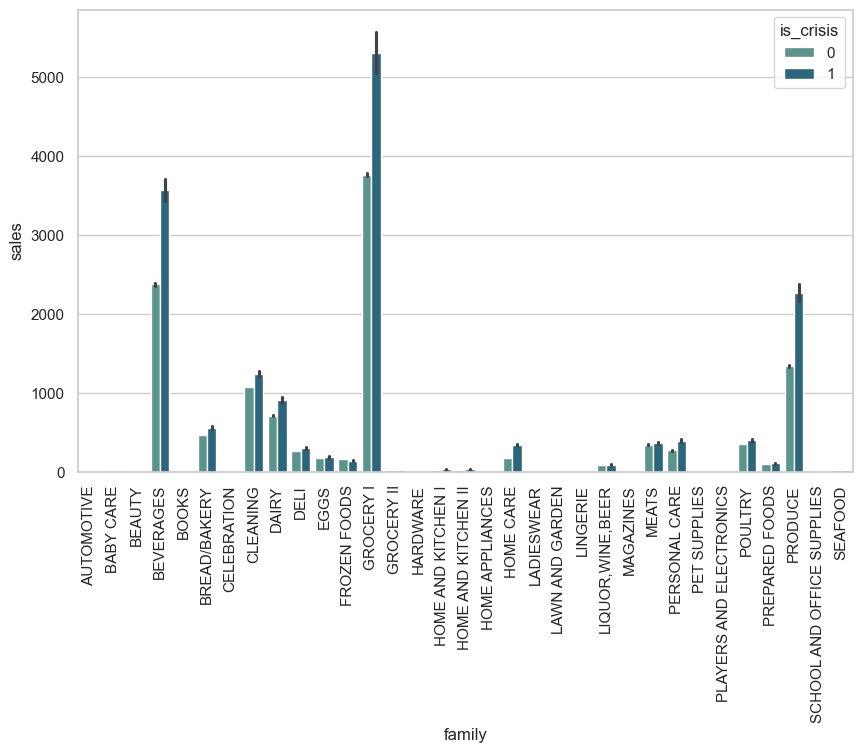

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x="family",y="sales",hue="is_crisis",palette="crest")
plt.xticks(rotation=90)
plt.show()

## 🛡️ 12.8 Crisis Impact by city and state

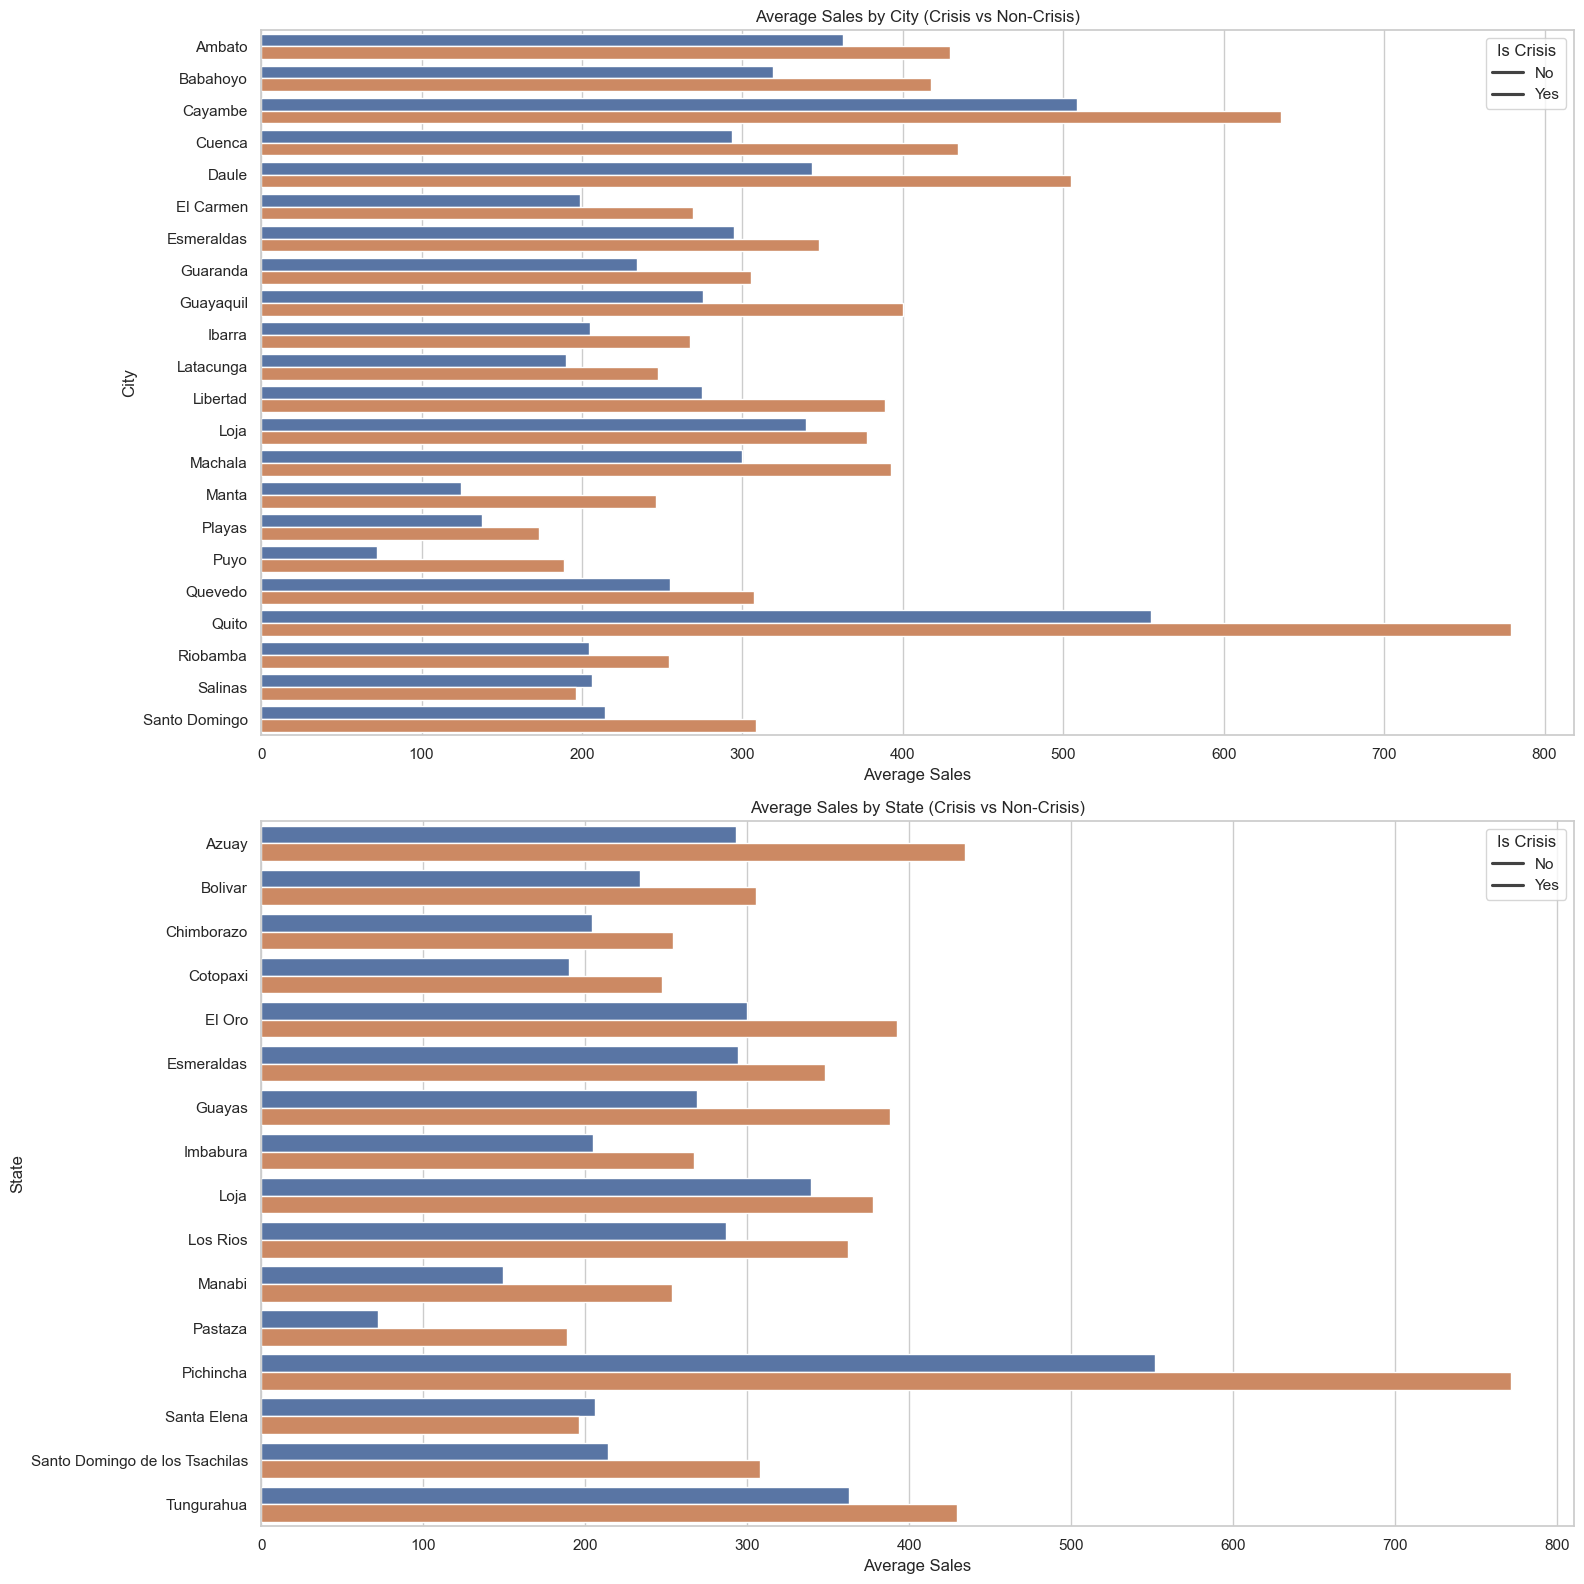

In [28]:
avg_sales_by_city_crisis = df.groupby(['city', 'is_crisis'])['sales'].mean().reset_index()
avg_sales_by_state_crisis = df.groupby(['state', 'is_crisis'])['sales'].mean().reset_index()

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(16, 16))

sns.barplot(
    data=avg_sales_by_city_crisis,
    x='sales',
    y='city',
    hue='is_crisis',
    ax=axes[0]
)
axes[0].set_title('Average Sales by City (Crisis vs Non-Crisis)')
axes[0].set_xlabel('Average Sales')
axes[0].set_ylabel('City')
axes[0].legend(title='Is Crisis', labels=['No', 'Yes'])

sns.barplot(
    data=avg_sales_by_state_crisis,
    x='sales',
    y='state',
    hue='is_crisis',
    ax=axes[1]
)
axes[1].set_title('Average Sales by State (Crisis vs Non-Crisis)')
axes[1].set_xlabel('Average Sales')
axes[1].set_ylabel('State')
axes[1].legend(title='Is Crisis', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## 🛡️ 12.9 Crisis Impact on Rolling Mean and Lagged Sales

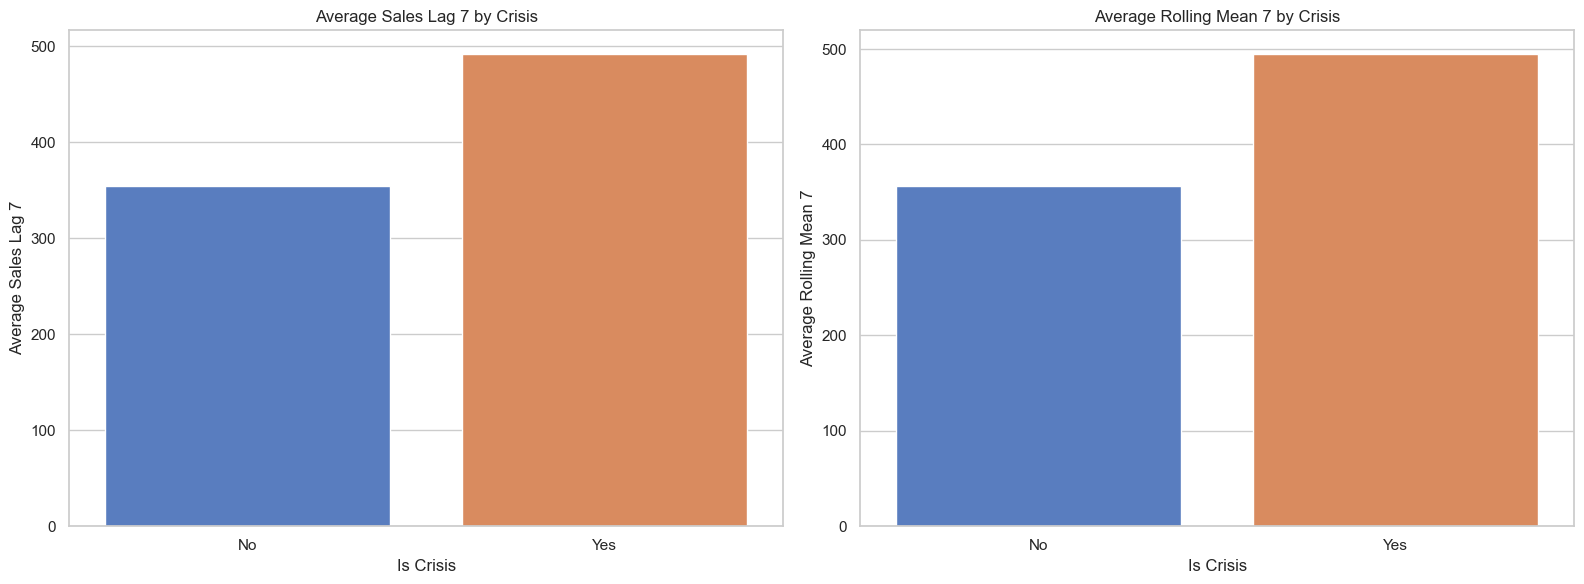

In [29]:
avg_sales_lag_7_crisis = df.groupby('is_crisis')['sales_lag_7'].mean().reset_index()
avg_rolling_mean_7_crisis = df.groupby('is_crisis')['rolling_mean_7'].mean().reset_index()

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot average sales_lag_7 by crisis
sns.barplot(
    data=avg_sales_lag_7_crisis,
    x='is_crisis',
    y='sales_lag_7',
    palette='muted',
    ax=axes[0]
)
axes[0].set_title('Average Sales Lag 7 by Crisis')
axes[0].set_xlabel('Is Crisis')
axes[0].set_ylabel('Average Sales Lag 7')
axes[0].set_xticklabels(['No', 'Yes'])

sns.barplot(
    data=avg_rolling_mean_7_crisis,
    x='is_crisis',
    y='rolling_mean_7',
    palette='muted',
    ax=axes[1]
)
axes[1].set_title('Average Rolling Mean 7 by Crisis')
axes[1].set_xlabel('Is Crisis')
axes[1].set_ylabel('Average Rolling Mean 7')
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

## 🛡️ 12.10 Crisis and Store Cluster Performance

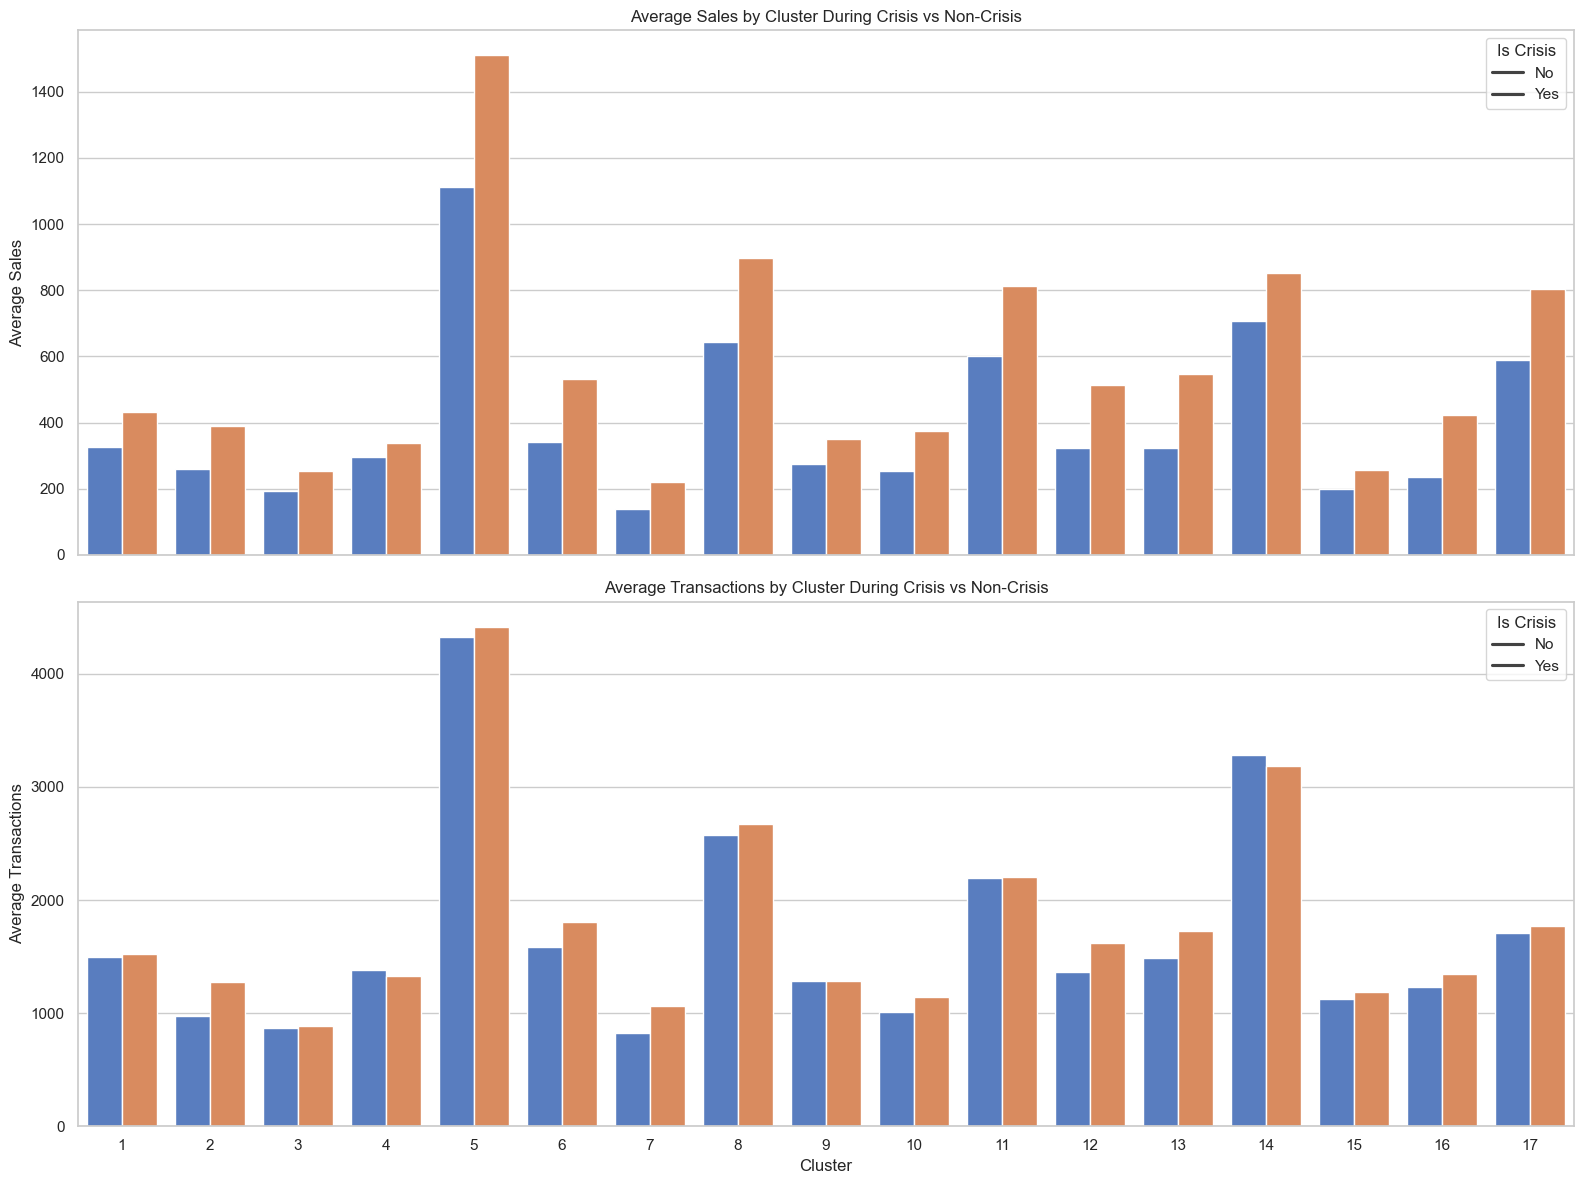

In [30]:
avg_sales_by_cluster_crisis = df.groupby(['cluster', 'is_crisis'])['sales'].mean().reset_index()
avg_transactions_by_cluster_crisis = df.groupby(['cluster', 'is_crisis'])['transactions'].mean().reset_index()

sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot average sales by cluster and crisis
sns.barplot(
    data=avg_sales_by_cluster_crisis,
    x='cluster',
    y='sales',
    hue='is_crisis',
    palette='muted',
    ax=axes[0]
)
axes[0].set_title('Average Sales by Cluster During Crisis vs Non-Crisis')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Sales')
axes[0].legend(title='Is Crisis', labels=['No', 'Yes'])

# Plot average transactions by cluster and crisis
sns.barplot(
    data=avg_transactions_by_cluster_crisis,
    x='cluster',
    y='transactions',
    hue='is_crisis',
    palette='muted',
    ax=axes[1]
)
axes[1].set_title('Average Transactions by Cluster During Crisis vs Non-Crisis')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Transactions')
axes[1].legend(title='Is Crisis', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# 🎉 13. How do sales differ on holidays vs. non-holidays overall?

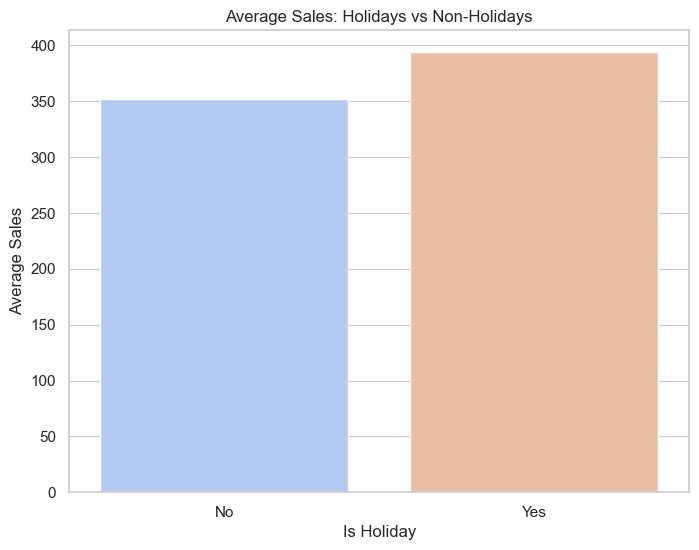

In [31]:
holiday_sales_comparison = df.groupby('is_holiday')['sales'].mean().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(
    data=holiday_sales_comparison,
    x='is_holiday',
    y='sales',
    palette='coolwarm'
)

plt.title('Average Sales: Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 🎉 14. Which type of holiday (national, regional, local) drives the highest sales?

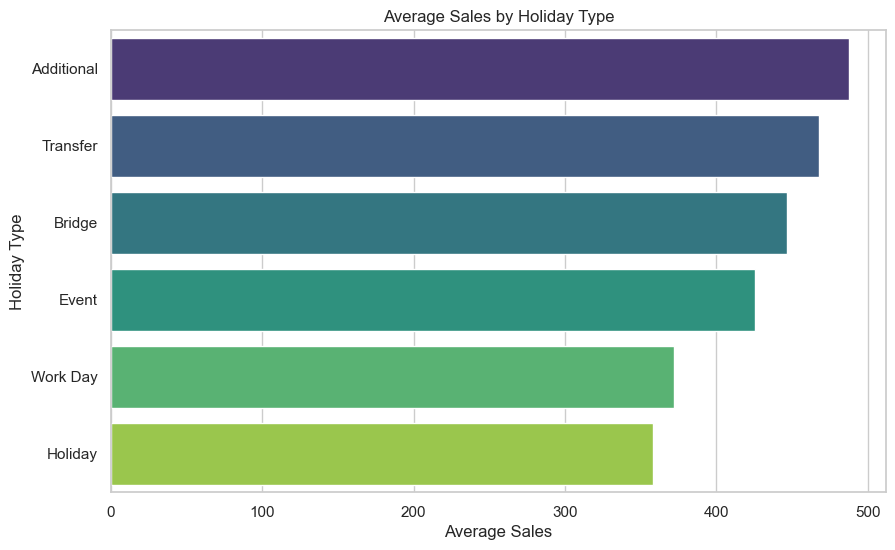

In [32]:
holiday_df = df[df['is_holiday'] == 1]

avg_sales_by_holiday_type = holiday_df.groupby('holiday_type')['sales'].mean().reset_index()

avg_sales_by_holiday_type = avg_sales_by_holiday_type.sort_values(by='sales', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(
    data=avg_sales_by_holiday_type,
    x='sales',
    y='holiday_type',
    palette='viridis'
)

plt.title('Average Sales by Holiday Type')
plt.xlabel('Average Sales')
plt.ylabel('Holiday Type')
plt.show()

# 🎉 15. Which product families see the biggest sales boost during holidays?

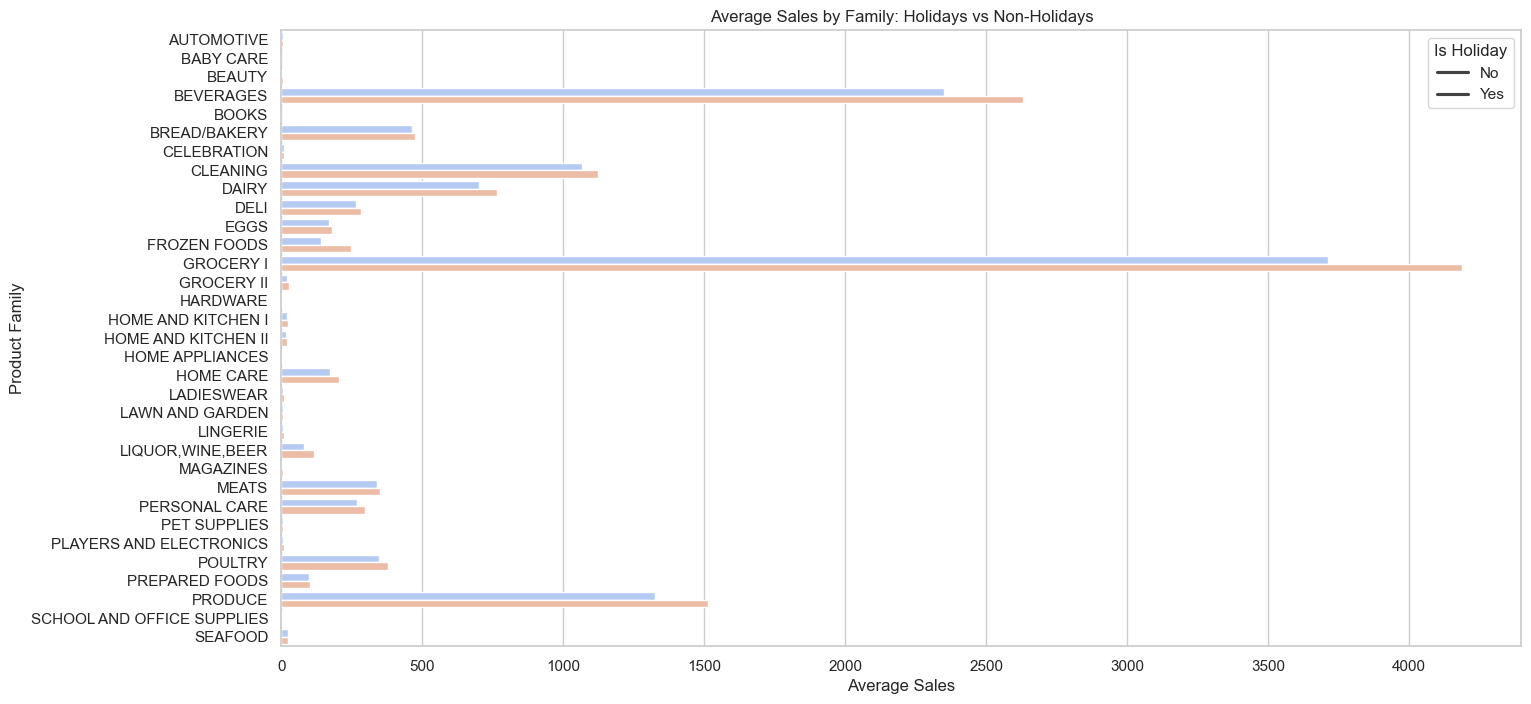

In [33]:
family_holiday_sales = df.groupby(['family', 'is_holiday'])['sales'].mean().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 8))

sns.barplot(
    data=family_holiday_sales,
    x='sales',
    y='family',
    hue='is_holiday',
    palette='coolwarm'
)

plt.title('Average Sales by Family: Holidays vs Non-Holidays')
plt.xlabel('Average Sales')
plt.ylabel('Product Family')
plt.legend(title='Is Holiday', labels=['No', 'Yes'])
plt.show()

# 🎉 16. Are certain stores or store types more sensitive to holiday sales spikes?

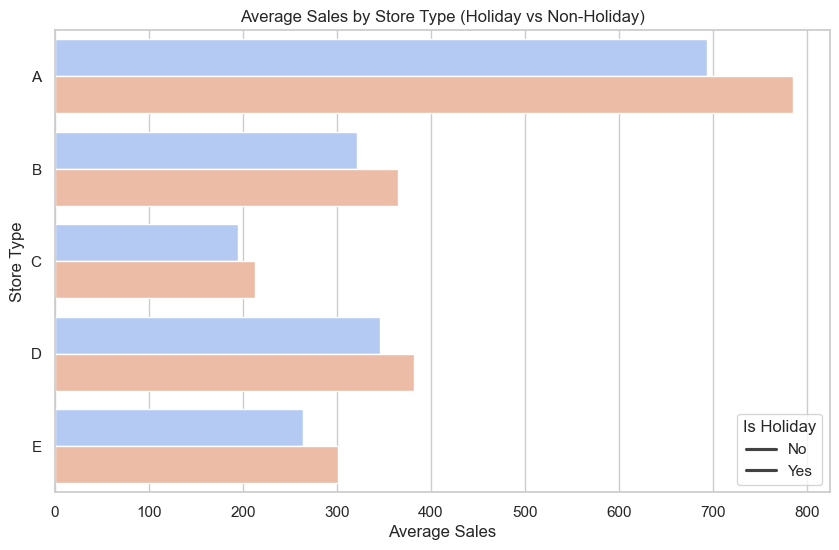

In [34]:
store_type_holiday_sales = df.groupby(['store_type', 'is_holiday'])['sales'].mean().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(
    data=store_type_holiday_sales,
    x='sales',
    y='store_type',
    hue='is_holiday',
    palette='coolwarm'
)

plt.title('Average Sales by Store Type (Holiday vs Non-Holiday)')
plt.xlabel('Average Sales')
plt.ylabel('Store Type')
plt.legend(title='Is Holiday', labels=['No', 'Yes'])
plt.show()

# 🎉 17. How many days before a holiday does sales start increasing?

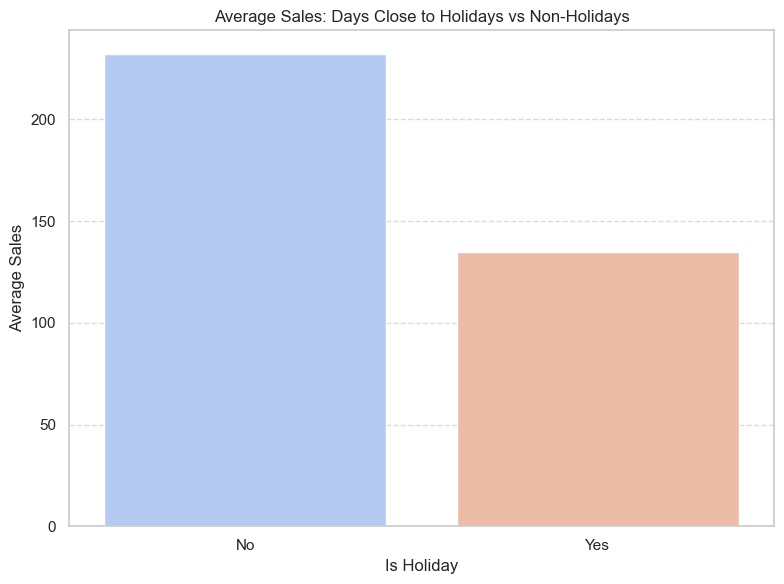

In [35]:
df['days_to_holiday'] = (df['date'] - df['date'].min()).dt.days

sales_increase_before_holiday = df[df['days_to_holiday'] < 7].groupby('is_holiday')['sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sales_increase_before_holiday, x='is_holiday', y='sales', palette='coolwarm')
plt.title('Average Sales: Days Close to Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🎉 18. Do sales drop after holidays ("post-holiday effect")?


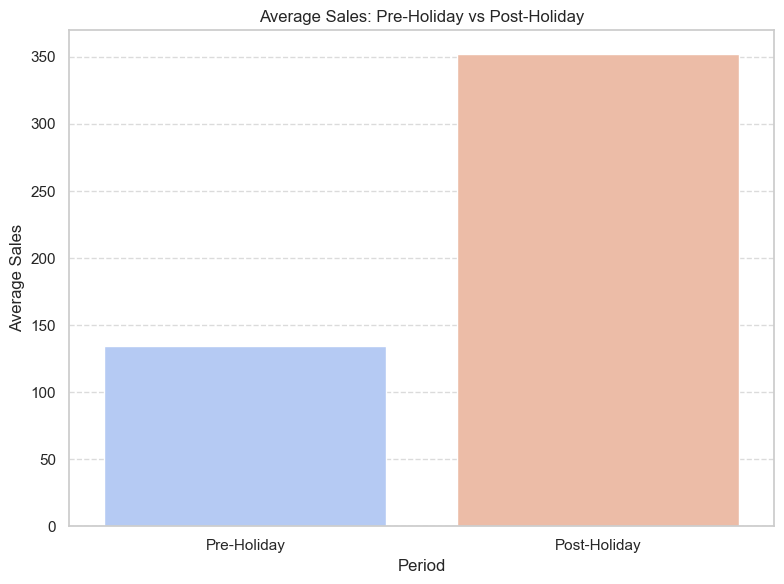

In [36]:
post_holiday_sales = df[(df['is_holiday'] == 0) & (df['days_to_holiday'] > 0)]['sales'].mean()
pre_holiday_sales = df[(df['is_holiday'] == 1) & (df['days_to_holiday'] < 7)]['sales'].mean()
# Create a DataFrame for visualization
sales_comparison = pd.DataFrame({
    'Period': ['Pre-Holiday', 'Post-Holiday'],
    'Average Sales': [pre_holiday_sales, post_holiday_sales]
})

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_comparison, x='Period', y='Average Sales', palette='coolwarm')

# Customize the plot
plt.title('Average Sales: Pre-Holiday vs Post-Holiday')
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🎉 19. Which city or state benefits the most from local holidays?


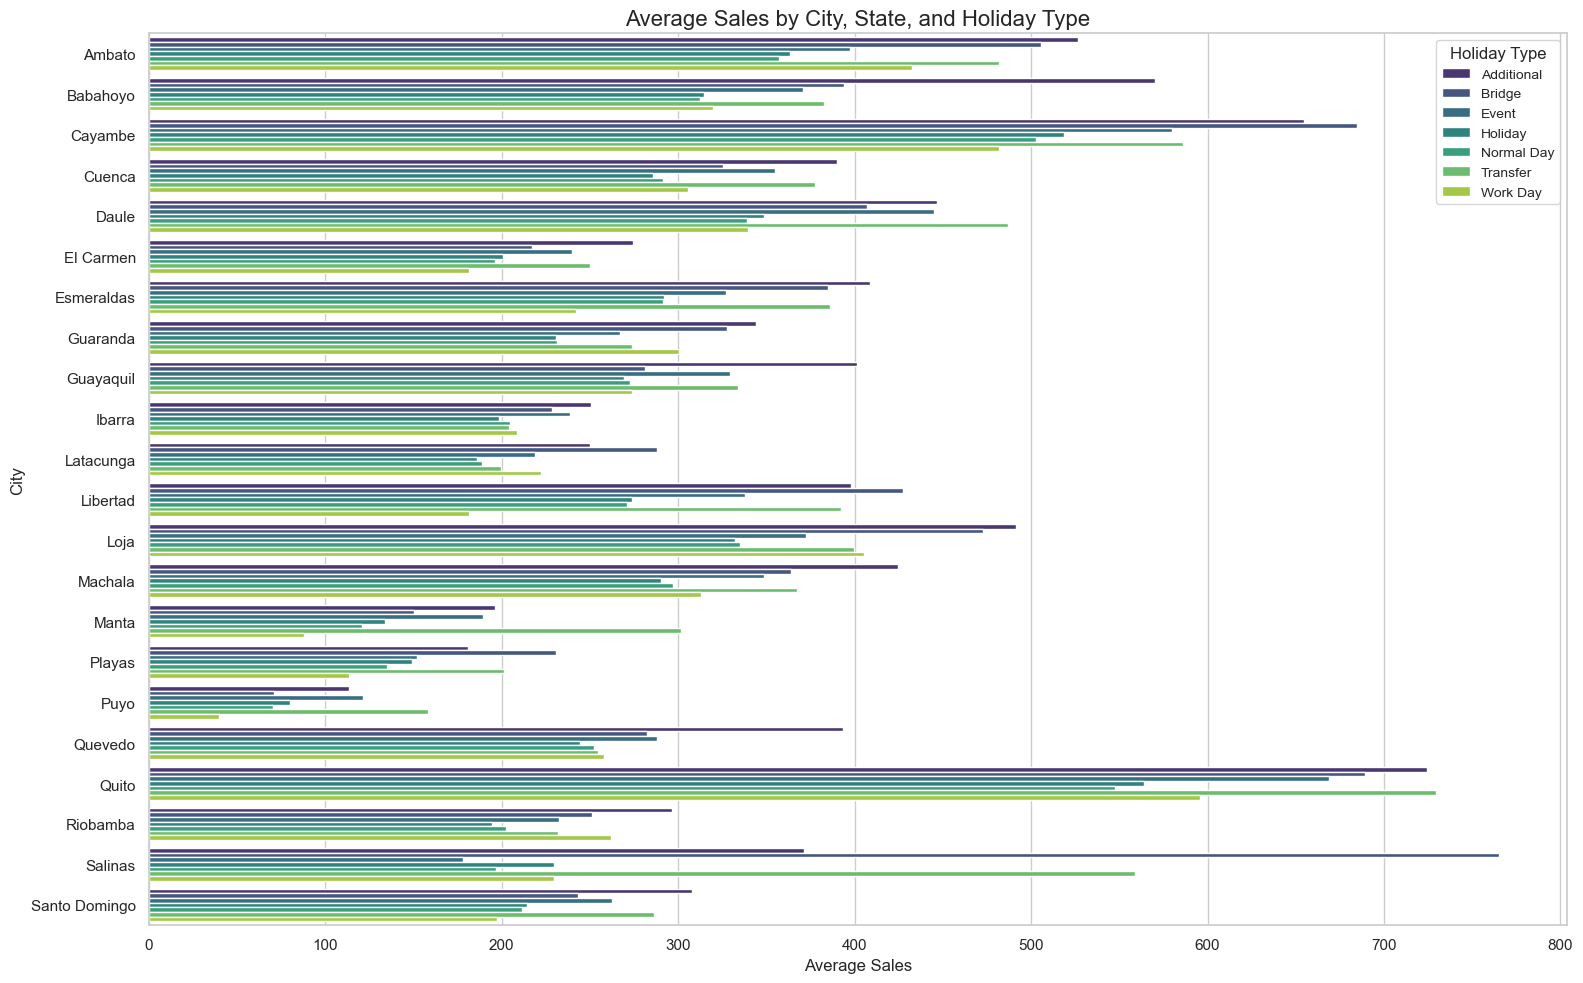

In [37]:
city_state_holiday_sales = df.groupby(['city', 'state', 'holiday_type'])['sales'].mean().reset_index()
city_state_holiday_sales
plt.figure(figsize=(16, 10))
sns.set_theme(style="whitegrid")

# Create the bar plot
sns.barplot(
    data=city_state_holiday_sales,
    x='sales',
    y='city',
    hue='holiday_type',
    palette='viridis'
)

# Customize the plot
plt.title('Average Sales by City, State, and Holiday Type', fontsize=16)
plt.xlabel('Average Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title='Holiday Type', fontsize=10)
plt.tight_layout()

plt.show()

# 🎉 20. Is there a difference in sales between transferred holidays and non-transferred holidays?


Transferred sales: 311.5602281117783, Non-transferred sales: 359.2714177512478


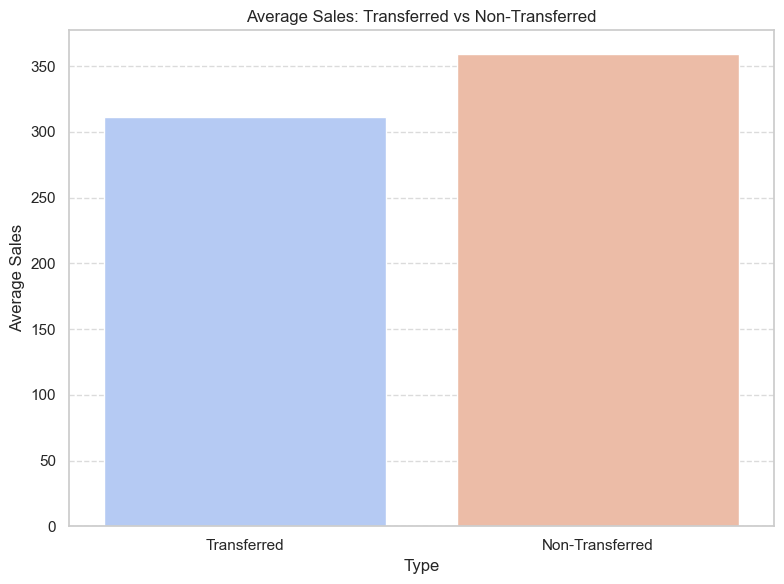

In [38]:
# Calculate average sales for transferred and non-transferred
transferred_sales = df[df['transferred'] == 1]['sales'].mean()
non_transferred_sales = df[df['transferred'] == 0]['sales'].mean()
print(f"Transferred sales: {transferred_sales}, Non-transferred sales: {non_transferred_sales}")

transferred_sales = df[df['transferred'] == 1]['sales'].mean()
non_transferred_sales = df[df['transferred'] == 0]['sales'].mean()

# Create a DataFrame for visualization
sales_data = pd.DataFrame({
    'Type': ['Transferred', 'Non-Transferred'],
    'Average Sales': [transferred_sales, non_transferred_sales]
})

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_data, x='Type', y='Average Sales', palette='coolwarm')

# Customize the plot
plt.title('Average Sales: Transferred vs Non-Transferred')
plt.xlabel('Type')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🎉 21. Do crisis periods reduce the usual holiday sales spike?


Crisis holiday sales: 494.9040719977209, Non-crisis holiday sales: 381.385802875458


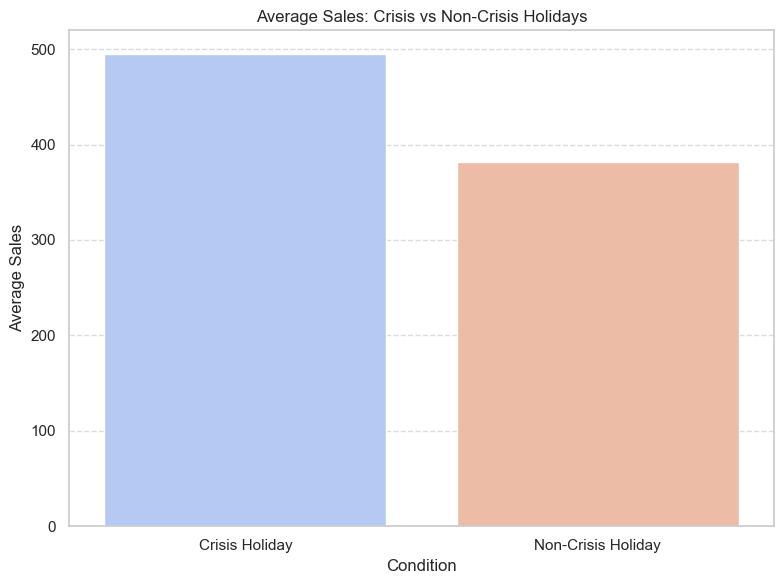

In [39]:
# Create a DataFrame for visualization
crisis_holiday_sales = df[(df['is_crisis'] == 1) & (df['is_holiday'] == 1)]['sales'].mean()
non_crisis_holiday_sales = df[(df['is_crisis'] == 0) & (df['is_holiday'] == 1)]['sales'].mean()
print(f"Crisis holiday sales: {crisis_holiday_sales}, Non-crisis holiday sales: {non_crisis_holiday_sales}")
crisis_holiday_sales_data = pd.DataFrame({
    'Condition': ['Crisis Holiday', 'Non-Crisis Holiday'],
    'Average Sales': [crisis_holiday_sales, non_crisis_holiday_sales]
})

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=crisis_holiday_sales_data, x='Condition', y='Average Sales', palette='coolwarm')

# Customize the plot
plt.title('Average Sales: Crisis vs Non-Crisis Holidays')
plt.xlabel('Condition')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🎉 22. Which quarter has the highest number of holidays and how does that affect total sales?


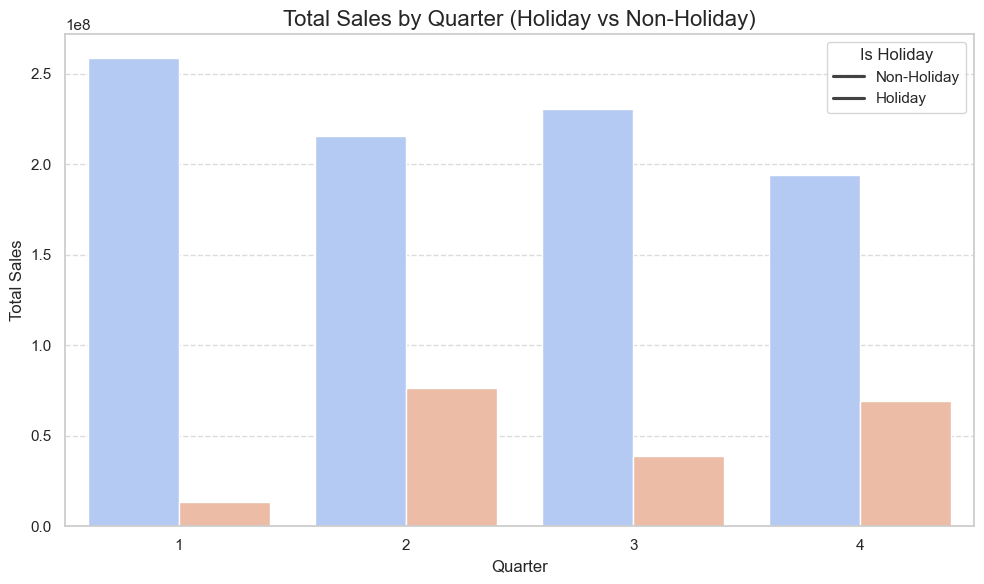

In [43]:
# Grouped bar chart for quarter holiday sales
quarter_holiday_sales = df.groupby(['quarter', 'is_holiday'])['sales'].sum().reset_index()
quarter_holiday_sales
plt.figure(figsize=(10, 6))
sns.barplot(
    data=quarter_holiday_sales,
    x='quarter',
    y='sales',
    hue='is_holiday',
    palette='coolwarm'
)

# Customize the plot
plt.title('Total Sales by Quarter (Holiday vs Non-Holiday)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Is Holiday', labels=['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🎉 23. Is there a cumulative effect of promotion and holiday together?

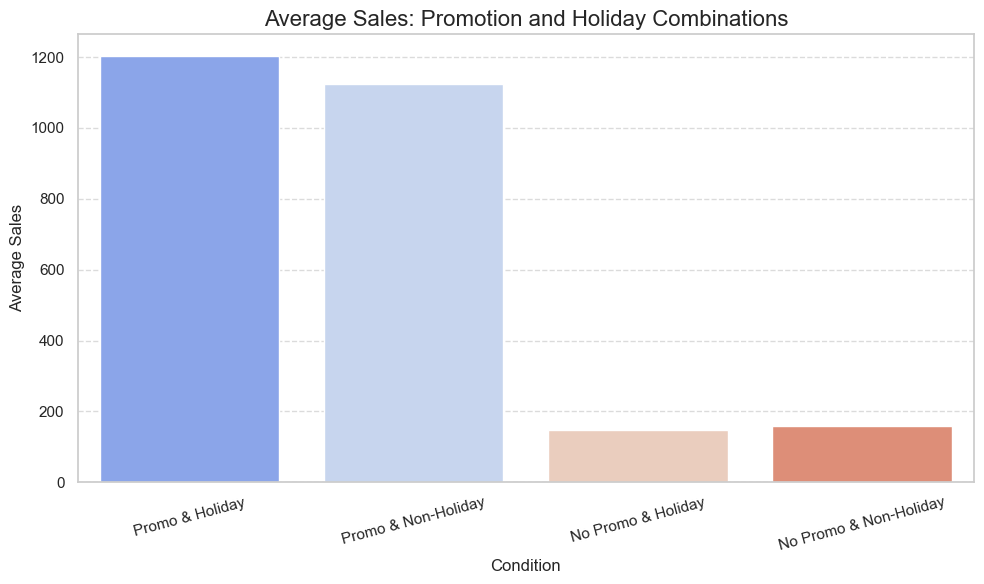

In [47]:
# Calculate average sales for different conditions
promo_holiday_sales_combined = df[(df['onpromotion'] > 0) & (df['is_holiday'] == 1)]['sales'].mean()
promo_non_holiday_sales = df[(df['onpromotion'] > 0) & (df['is_holiday'] == 0)]['sales'].mean()
non_promo_holiday_sales = df[(df['onpromotion'] == 0) & (df['is_holiday'] == 1)]['sales'].mean()
non_promo_non_holiday_sales = df[(df['onpromotion'] == 0) & (df['is_holiday'] == 0)]['sales'].mean()

# Create a DataFrame for visualization
sales_conditions = pd.DataFrame({
    'Condition': ['Promo & Holiday', 'Promo & Non-Holiday', 'No Promo & Holiday', 'No Promo & Non-Holiday'],
    'Average Sales': [promo_holiday_sales_combined, promo_non_holiday_sales, non_promo_holiday_sales, non_promo_non_holiday_sales]
})

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_conditions, x='Condition', y='Average Sales', palette='coolwarm')

# Customize the plot
plt.title('Average Sales: Promotion and Holiday Combinations', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🛒 24. What is the relationship between the number of transactions and sales?


Correlation between Transactions and Sales: 0.2330


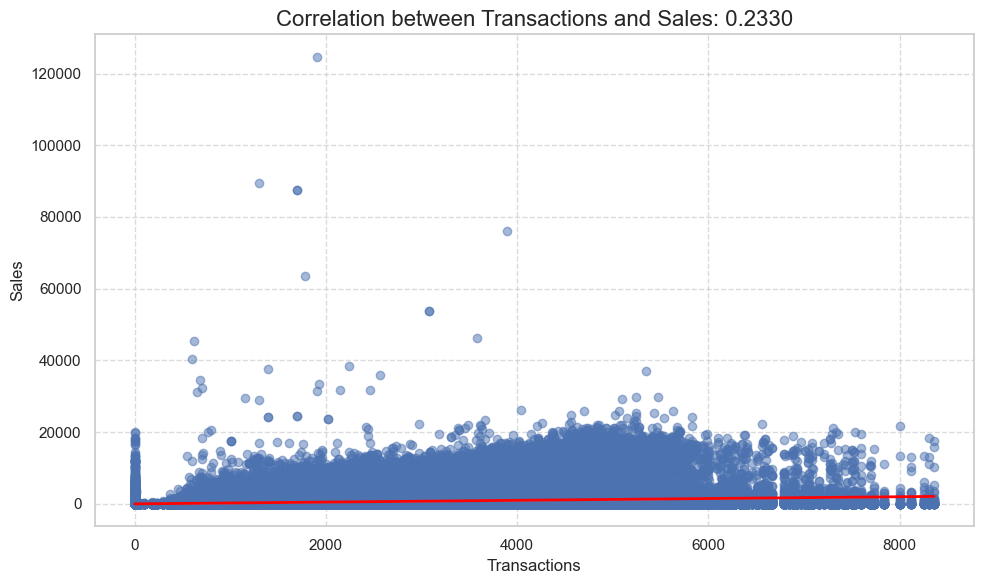

In [46]:
# Calculate correlation
correlation = df['transactions'].corr(df['sales'])
print(f'Correlation between Transactions and Sales: {correlation:.4f}')

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='transactions',
    y='sales',
    data=df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Customize the plot
plt.title(f'Correlation between Transactions and Sales: {correlation:.4f}', fontsize=16)
plt.xlabel('Transactions', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()